In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# basan or si data as size and ribosome prot frac (via R/P) ratio data for three mods
data = pd.read_csv('external-data/basan_2015_data.csv')
data.head()

,growth_rate_per_hr,media_details,source_cell_length_um,source_cell_width_um,source_cell_volume_um3,nutrient_type,cm_type,useless_type,cm_uM,RNA_ug_per_OD600,prot_ug_per_OD,source,RNA_prot_ratio,dry_mass_per_OD,cell_number_10_8_per_OD,cell_mass
0,0.42,Mannose,2.37,0.91,1.36,15,0,0,0,66,391,Basan 2015,0.168798,513,19.40,26.443299
1,0.47,Acetate,2.51,0.98,1.67,14,0,0,0,65,378,Basan 2015,0.171958,516,17.10,30.175439
2,0.70,Glycerol,2.84,0.92,1.70,13,0,0,0,83,355,Basan 2015,0.233803,522,16.00,32.625000
3,0.98,Glucose,2.95,1.07,2.32,12,0,0,0,98,333,Basan 2015,0.294294,494,10.70,46.168224
4,1.29,Glucose + cAA,3.29,1.21,3.33,11,0,0,0,115,317,Basan 2015,0.362776,500,7.93,63.051702


In [3]:
# compute the ribosome proteome fraction based on scott et al. conversion factor
data['phi_R'] = 0.76 * data['RNA_prot_ratio']

In [4]:
# compute 'metabolic' proteome fraction based on scott 2010 allocation theory (single parameter phi_R_max)
phi_R_max = 0.5

d_nut_only = data.query('cm_type == 0 and useless_type == 0').copy()
d_cm = data.query('cm_type > 0 and useless_type == 0').copy()
d_useless = data.query('cm_type == 0 and useless_type > 0').copy()

d_nut_only['phi_E'] = phi_R_max - d_nut_only['phi_R']

d_useless['phi_E'] = np.nan
for ir,r in d_useless.iterrows():
    nut_type = r['nutrient_type']
    d_this_nut = d_nut_only.query(f'nutrient_type == {nut_type}')
    d_useless.at[ir,'phi_E'] = d_this_nut['phi_E'] * r['growth_rate_per_hr'] / d_this_nut['growth_rate_per_hr']
    
d_cm['phi_E'] = np.nan
for ir,r in d_cm.iterrows():
    nut_type = r['nutrient_type']
    d_this_nut = d_nut_only.query(f'nutrient_type == {nut_type}')
    d_cm.at[ir,'phi_E'] = d_this_nut['phi_E'] * r['growth_rate_per_hr'] / d_this_nut['growth_rate_per_hr'] 
    
data = pd.concat([d_nut_only, d_useless, d_cm])

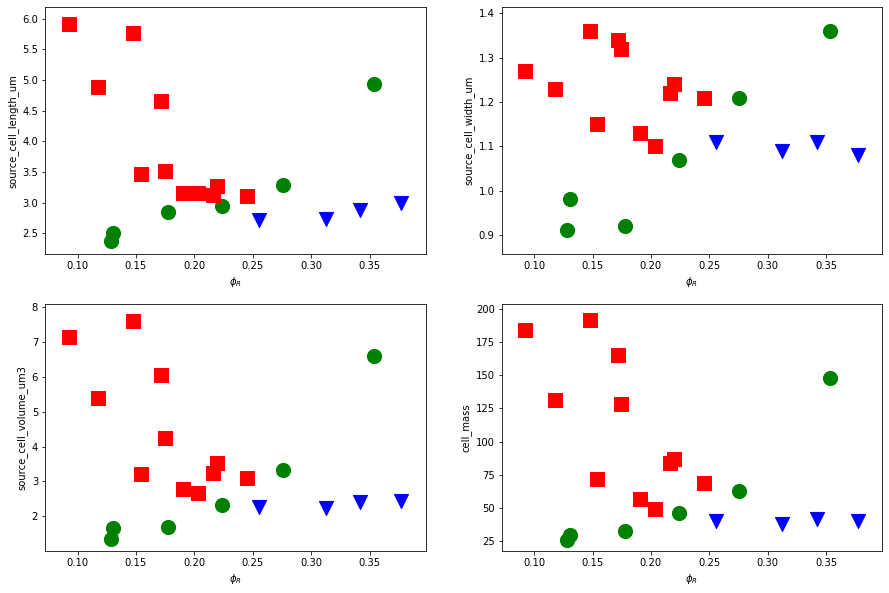

In [5]:
fig, axs = plt.subplots(figsize=(15,10),ncols=2,nrows=2)
for d,c,mk in zip([d_nut_only, d_useless, d_cm],['g', 'r', 'b'],['o','s','v']):
    for ax,prop in zip(axs.ravel(), 
                       ['source_cell_length_um', 'source_cell_width_um', 'source_cell_volume_um3','cell_mass']):
        ax.scatter(d['phi_R'], d[prop], c=c, marker=mk, s=200)
        ax.set_ylabel(prop)
        ax.set_xlabel('$\phi_R$')
plt.show()

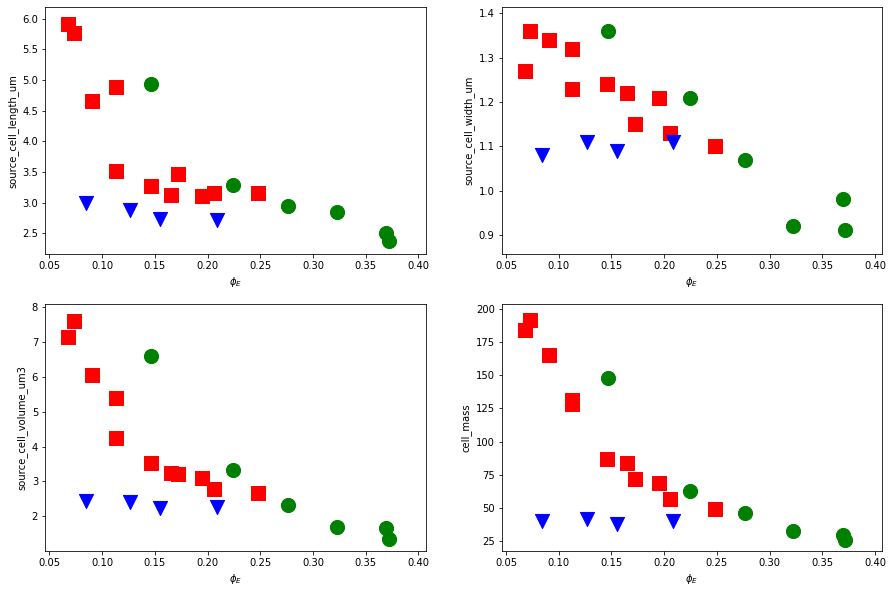

In [6]:
fig, axs = plt.subplots(figsize=(15,10),ncols=2,nrows=2)
for d,c,mk in zip([d_nut_only, d_useless, d_cm],['g', 'r', 'b'],['o','s','v']):
    for ax,prop in zip(axs.ravel(), 
                       ['source_cell_length_um', 'source_cell_width_um', 'source_cell_volume_um3','cell_mass']):
        ax.scatter(d['phi_E'], d[prop], c=c, marker=mk, s=200)
        ax.set_ylabel(prop)
        ax.set_xlabel('$\phi_E$')
plt.show()

Text(0, 0.5, 'phi_R')

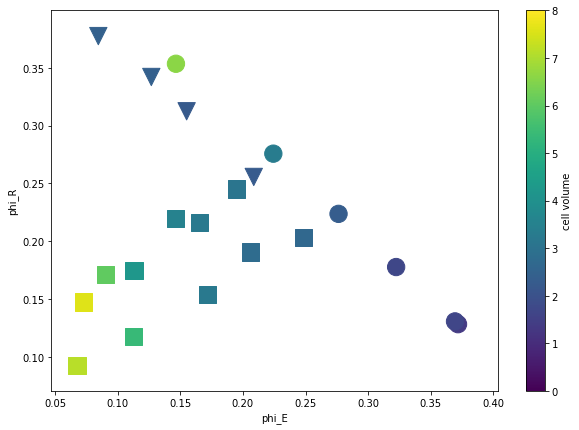

In [7]:
plt.figure(figsize=(10,7))

for d,mk in zip([d_nut_only, d_useless, d_cm],['o', 's', 'v']):
    plt.scatter(d['phi_E'], d['phi_R'], 
                marker=mk, s=300, vmin = 0, vmax = 8,
                c=d['source_cell_volume_um3'])
plt.colorbar(label = 'cell volume')
plt.xlabel('phi_E')
plt.ylabel('phi_R')

Text(0, 0.5, 'phi_R')

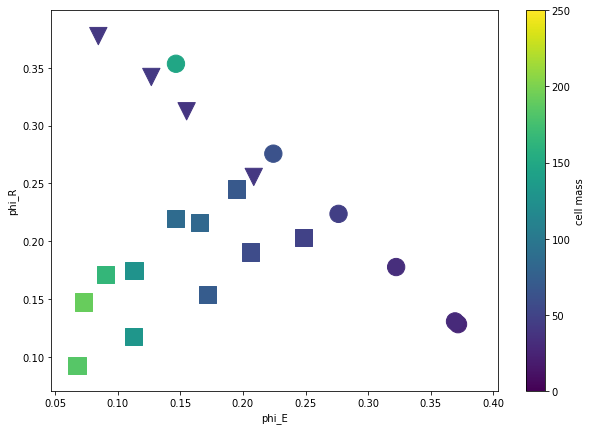

In [8]:
plt.figure(figsize=(10,7))

for d,mk in zip([d_nut_only, d_useless, d_cm],['o', 's', 'v']):
    plt.scatter(d['phi_E'], d['phi_R'], 
                marker=mk, s=300, vmin = 0, vmax = 250,
                c=d['cell_mass'])
plt.colorbar(label = 'cell mass')
plt.xlabel('phi_E')
plt.ylabel('phi_R')